[[580. 512.]
 [605. 510.]
 [624. 511.]
 [646. 511.]
 [663. 512.]
 [675. 515.]
 [694. 514.]]
lArrayNeg:  [1.0274217  1.02985796 1.03226903 1.03474189 1.03675971 1.03846148
 1.04023019 1.04183862 1.04433415 1.04576038 1.04703593 1.04806289
 1.04932691 1.05004464 1.05072384 1.05124551 1.05194459 1.05194592
 1.05335302 1.05305618 1.05239051 1.05157815 1.05136059 1.04966464
 1.04833931 1.04934048 1.04456992 1.04242235 1.04355329 1.04202306
 1.04099094 1.04051627 1.03991299 1.04037107 1.04200883]
rArrayNeg:  [0.03910174 0.0427908  0.04649521 0.05021888 0.05393554 0.05764807
 0.06137573 0.06510496 0.06730457 0.07104323 0.07478021 0.07850655
 0.08225767 0.08597187 0.08968673 0.09339123 0.09711876 0.10077884
 0.10296932 0.10660219 0.11019308 0.11376213 0.11739057 0.12084587
 0.12433187 0.12809115 0.13113126 0.13447506 0.13664979 0.14005885
 0.14352428 0.1470596  0.15057122 0.15423418 0.15807738]
dArrayNeg:  [0.35182285 0.35182285 0.35182285 0.35182285 0.35182285 0.35182285
 0.35182285 0.3518228

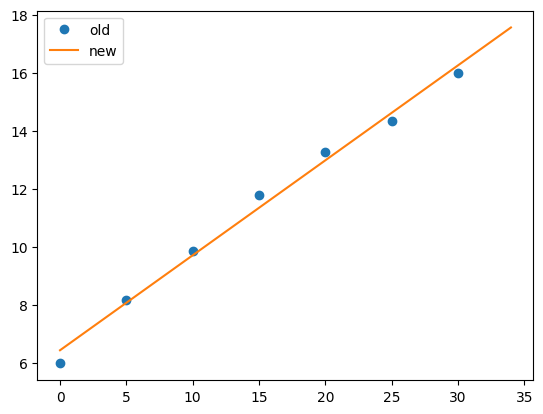

<Figure size 640x480 with 0 Axes>

In [16]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import fsolve


epsilonArray = np.load('output/outputEpsilon.npy')
xiPrimeNegArray = np.load('output/outputXiNeg.npy')
xiPrimePosArray = np.load('output/outputXiPos.npy')
centerArray = np.load('output/outputCenter.npy',allow_pickle=True)
print(centerArray)
radiusArray = np.load('output/outputRadius.npy')

rArrayPos = np.zeros(len(centerArray))
rArrayNeg = np.zeros(len(centerArray))

lArrayPos = np.zeros(len(centerArray))
lArrayNeg = np.zeros(len(centerArray))

epsilonPrimeArray = np.zeros(len(centerArray))

for i in range(len(centerArray)):

    xValue, yValue = centerArray[i][0], centerArray[i][1]
    xValue = xValue - 512
    yValue = yValue - 512

    xValue = xValue*45/512
    yValue = yValue*45/512

    epsilonPrimeArray[i] = np.sqrt(xValue**2 + yValue**2)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), epsilonPrimeArray)
epsilonPrimeArrayNew = linearFunc(np.arange(15,50), *parameters)

plt.figure()
plt.plot(np.arange(0,35,5),epsilonPrimeArray, 'o', label='old')
plt.plot(np.arange(0,35),epsilonPrimeArrayNew, '-', label='new')
plt.legend()
plt.figure()

    
rArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
rArrayPos = np.zeros(len(epsilonPrimeArrayNew))
lArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
lArrayPos = np.zeros(len(epsilonPrimeArrayNew))
dArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
dArrayPos = np.zeros(len(epsilonPrimeArrayNew))

# for positive xi
for i in range(len(epsilonPrimeArrayNew)):

    xi = xiPrimePosArray[i]
    epsilon = epsilonArray[i]
    epsilonPrime = epsilonPrimeArrayNew[i]

    chi = 180 - epsilon - (90 - xi)
    s = np.sin(np.pi/2-np.deg2rad(xi))/np.sin(np.deg2rad(chi))
    r = s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    l = np.sqrt(r**2 + s**2)
    d = np.sqrt(l**2 + 1**2 - 2*l*1*np.cos(np.deg2rad(epsilonPrime)))

    rArrayPos[i] = r
    lArrayPos[i] = l
    dArrayPos[i] = d

    # theta = 90 - xiPrimePosArray[i]
    # epsilon = epsilonArray[i]
    # chi = 180 - epsilon - theta
    # s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    # epsilonPrime = epsilonPrimeArrayNew[i]

    # r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    # rArrayPos[i] = r

    # l = np.sqrt(r**2 + s**2)
    # lArrayPos[i] = l

for i in range(len(epsilonPrimeArrayNew)):

    xi = xiPrimeNegArray[i]
    epsilon = epsilonArray[i]
    epsilonPrime = epsilonPrimeArrayNew[i]

    chi = 180 - epsilon - (90 - xi)
    s = np.sin(np.pi/2-np.deg2rad(xi))/np.sin(np.deg2rad(chi))
    r = s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    l = np.sqrt(r**2 + s**2)

    rArrayNeg[i] = r
    lArrayNeg[i] = l
    dArrayNeg[i] = d

    # theta = 90 - xiPrimeNegArray[i]
    # epsilon = epsilonArray[i]
    # chi = 180 - epsilon - theta
    # s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    # epsilonPrime = epsilonPrimeArrayNew[i]
    
    # r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    # rArrayNeg[i] = r

    # l = np.sqrt(r**2 + s**2)
    # lArrayNeg[i] = l



print("lArrayNeg: ",lArrayNeg)
print("rArrayNeg: ",rArrayNeg)
print("dArrayNeg: ",dArrayNeg)
print("xiPrimeNegarray", xiPrimeNegArray)

print("lArrayPos: ",lArrayPos)
print("rArrayPos: ",rArrayPos)
print("dArrayPos: ",dArrayPos)
print("xiPrimePosarray", xiPrimePosArray)

print("epsilonArray: ", epsilonArray)


In [17]:
def trueXi(l, r, d, xiPrime):
    
    theta = np.arccos(r/l) + np.arccos((d**2 + l**2 - 1**2)/(2*l*d)) - np.pi

    return np.rad2deg(r*theta/(r+d)) + xiPrime

    # d = np.sqrt(l**2 + 1 - 2*l*np.cos(np.deg2rad(epsilon)))

    # chiPrime = np.rad2deg(np.arccos((l**2 + d**2 - 1)/(2*l*d)))

    
    # func = lambda xi :  -xiPrime + xi + r/(r+d)*(180 - chiPrime- np.rad2deg(np.arccos(r/l)))
    # sol = fsolve(func, xiPrime)

    # print("d: ", d)
    # print("l: ", l)
    # print("r: ", r)
    # print("epsilon: ", epsilon)
    # print("xiPrime: "   , xiPrime)
    # print("func(sol) = " , func(sol))
    # print("xi: ", sol)
    # if(xiPrime == sol):
    #     return np.nan
    # return sol



xiNegarray = np.zeros(35)
xiPosarray = np.zeros(35)

print("xiPrimeNegArray: ", xiPrimeNegArray)
print("xiPrimePosArray: ", xiPrimePosArray)

for i in range(35):
    if np.isnan(xiPrimeNegArray[i]) or np.isnan(xiPrimePosArray[i]):
        xiNegarray[i] = np.nan
        xiPosarray[i] = np.nan
        continue
    xiNegarray[i] = trueXi(lArrayNeg[i], rArrayNeg[i], dArrayNeg[i], xiPrimeNegArray[i])
    xiPosarray[i] = trueXi(lArrayPos[i], rArrayPos[i], dArrayPos[i], xiPrimePosArray[i])

print("xiNegarray: ", xiNegarray)
print("xiPosarray: ", xiPosarray)

xiPrimeNegArray:  [-5.60807802 -5.55651222 -5.46721463 -5.37224634 -5.12529163 -4.78625132
 -4.46682077 -4.10829795 -4.10246351 -3.69793098 -3.26749382 -2.7934241
 -2.37916704 -1.86477696 -1.35661272 -0.83221119 -0.35248897  0.23731831
  0.46232516  1.07851404  1.73669032  2.39910519  2.95283278  3.71308619
  4.39770769  4.73496802  5.86936563  6.61191694  6.80841189  7.4436732
  8.00104104  8.47783252  8.9630883   9.31342242  9.52342799]
xiPrimePosArray:  [22.83464052 23.83776222 24.80315213 25.76287134 26.57060413 27.28625132
 28.02150827 28.71767295 29.59074476 30.24089973 30.86515007 31.44576785
 32.08619829 32.62649571 33.17301897 33.70330494 34.27872561 34.7435921
 35.39748068 35.83596698 36.23246658 36.62472821 37.12567771 37.42010191
 37.79015852 38.50757675 38.42785814 38.73998622 39.42239105 39.84180978
 40.33912231 40.91701151 41.48643669 42.19078379 43.03545971]
xiNegarray:  [-7.26319817 -7.41319439 -7.53250736 -7.65476087 -7.62210112 -7.4957181
 -7.39555373 -7.25702988 -7.

In [18]:
maxImages = 20

posCoef = np.polyfit(np.arange(0,maxImages),xiPosarray[:maxImages],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])

posMean = np.mean(xiPosarray[:maxImages])
print("pos mean: ", posMean)
print("pos sigma:", np.std(xiPosarray[:maxImages]))

negCoef = np.polyfit(np.arange(0,maxImages),xiNegarray[:maxImages],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])

negMean = np.mean(xiNegarray[:maxImages])
print("neg mean: ", np.mean(negMean))
print("neg sigma:", np.std(xiNegarray[:maxImages]))

pos m:  0.7502238022721519
pos b:  28.512848284530822
pos mean:  35.639974406116266
pos sigma: 4.3671217687437425
neg m:  0.1566202025319615
neg b:  -8.117867077301756
neg mean:  -6.629975153248123
neg sigma: 0.9854221493948457


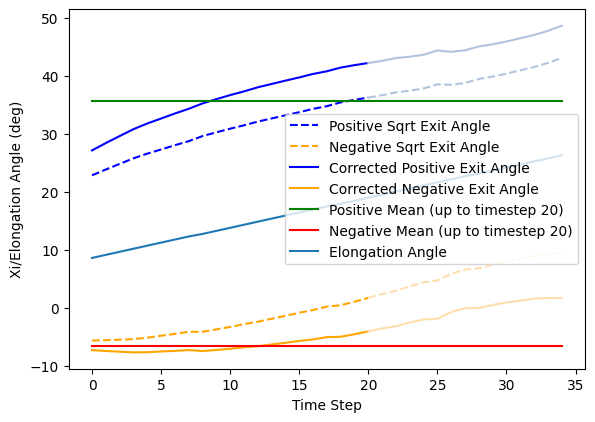

In [19]:
fig, axs = plt.subplots(figsize=(10/1.5,7/1.5))   
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimePosArray[:maxImages+1], label='Positive Sqrt Exit Angle', color='blue', linestyle='dashed')
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimeNegArray[:maxImages+1], label='Negative Sqrt Exit Angle', linestyle='dashed', color='orange') 
axs.plot(np.arange(0,35)[:maxImages+1],xiPosarray[:maxImages+1], label='Corrected Positive Exit Angle', linestyle='solid', color='blue')
axs.plot(np.arange(0,35)[:maxImages+1],xiNegarray[:maxImages+1], label='Corrected Negative Exit Angle', linestyle='solid', color='orange')

axs.plot(np.arange(0,35)[maxImages:],xiPrimePosArray[maxImages:], color='lightsteelblue', linestyle='dashed')
axs.plot(np.arange(0,35)[maxImages:],xiPrimeNegArray[maxImages:], linestyle='dashed', color='navajowhite') 
axs.plot(np.arange(0,35)[maxImages:],xiPosarray[maxImages:], linestyle='solid', color='lightsteelblue')
axs.plot(np.arange(0,35)[maxImages:],xiNegarray[maxImages:], linestyle='solid', color='navajowhite')

axs.plot(np.arange(0,35), np.full(35, posMean), label='Positive Mean (up to timestep 20)', color='green')
axs.plot(np.arange(0,35), np.full(35, negMean), label='Negative Mean (up to timestep 20)', color='red')
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='best') 
plt.show()

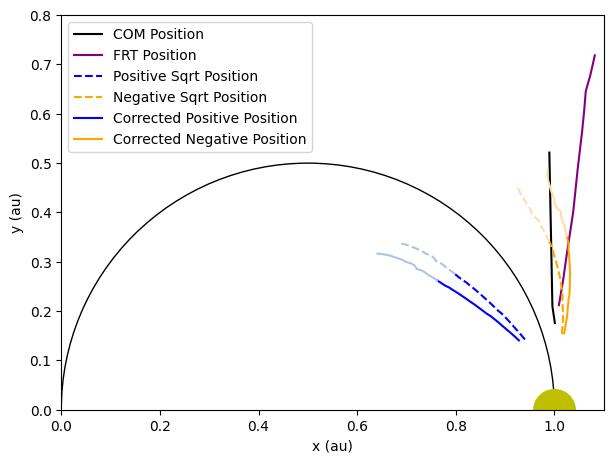

In [20]:
def calculatePositions(array, epsilonArray):
    positionArray = np.zeros((len(array),2))
    for i in range(len(array)):
        xi = array[i]
        epsilon = epsilonArray[i]
        cotXi = 1/np.tan(np.radians(xi))
        # print("cotXi = ", cotXi)
        tanE = np.tan(np.radians(epsilon))
        # print("tanE = ", tanE)
        x = cotXi/(tanE + cotXi)
        y = tanE*x
        positionArray[i] = np.array([x,y])
    
    return positionArray


fig, axs = plt.subplots(1,1, figsize=(7,7))
axs.plot(1,0, 'yo', markersize=30)

posPositionArray = calculatePositions(xiPrimePosArray, epsilonArray)
negPositionArray = calculatePositions(xiPrimeNegArray, epsilonArray)
posPositionArrayAdj = calculatePositions(xiPosarray, epsilonArray)
negPositionArrayAdj = calculatePositions(xiNegarray, epsilonArray)

np.save("output_compare_data/posPositionArrayIso.npy", posPositionArray)
np.save("output_compare_data/negPositionArrayIso.npy", negPositionArray)
np.save("output_compare_data/posPositionArrayAdjIso.npy", posPositionArrayAdj)
np.save("output_compare_data/negPositionArrayAdjIso.npy", negPositionArrayAdj)

com_data = np.load("output/com_data.npy")
frt_data = np.load("output/frt_data.npy")

axs.plot(com_data[:,0],com_data[:,1], label='COM Position', color='black')
axs.plot(frt_data[:,0],frt_data[:,1], label='FRT Position', color='purple')


axs.plot(posPositionArray[:maxImages+1,0],posPositionArray[:maxImages+1,1],color='blue', label='Positive Sqrt Position', linestyle='dashed')
axs.plot(negPositionArray[:maxImages+1,0],negPositionArray[:maxImages+1,1],color='orange', label='Negative Sqrt Position', linestyle='dashed')
axs.plot(posPositionArrayAdj[:maxImages+1,0],posPositionArrayAdj[:maxImages+1,1],color='blue', label='Corrected Positive Position', linestyle='solid')
axs.plot(negPositionArrayAdj[:maxImages+1,0],negPositionArrayAdj[:maxImages+1,1],color='orange', label='Corrected Negative Position', linestyle='solid')

axs.plot(posPositionArray[maxImages:,0],posPositionArray[maxImages:,1],color='lightsteelblue', linestyle='dashed')
axs.plot(negPositionArray[maxImages:,0],negPositionArray[maxImages:,1],color='navajowhite', linestyle='dashed')
axs.plot(posPositionArrayAdj[maxImages:,0],posPositionArrayAdj[maxImages:,1],color='lightsteelblue', linestyle='solid')
axs.plot(negPositionArrayAdj[maxImages:,0],negPositionArrayAdj[maxImages:,1],color='navajowhite', linestyle='solid')



# axs.plot([1,1+np.cos(np.deg2rad(posMean+90))],[0,np.sin(np.deg2rad(posMean+90))], color = 'green', label='Positive Mean (up to timestep 20)')
# axs.plot([1,1 +np.cos(np.deg2rad(negMean+90))],[0,np.sin(np.deg2rad(negMean+90))], color = 'red', label='Negative Mean (up to timestep 20)')

thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
axs.add_patch(thomson)
axs.set_aspect('equal')
axs.set_ylim(0,0.8)
axs.set_xlim(0,1.1)


axs.set_xlabel('x (au)')
axs.set_ylabel('y (au)')

axs.legend(loc='upper left')

plt.savefig("cme_correction_plot.png", dpi=300)

plt.show()
